##**Mchezopesa Ltd  football analysis.**

##**Defining the Question.**

###a) Specifying the Question

Prediction of match results based on which team is at Home and which is away, the type of the tourament ie Friendly, Fifa World Cup etc and the Rank of the team Approaches to be used

**Approach 1: Polynomial approach**
What to train given the :

1. Rank of home team

2. Rank of away team

3. tournament Type

Model 1: Predict how many goals the home team scores

Model 2: Predict how many goals the away team scores

**Approach 2 Logistic approach**

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

###b) Defining the Metric for Success

Correctly merge the two datasets
Perform Polynomial Regression and compare to the RMSE score
Archieve Logistic Regression

###c) Understanding the context

 The data contains two datasets with the ranking of the teams from 1993 to 2019 and the results between two teams within the same period.The results includes the scores that they won either at their home country or away.
 
  Task to predict the output of the matches to be played in the near future

###d) Recording the Experimental Design


(CRISP- DM)Get the data, understand the data, Clean the data, Explore the data, Train the model, Test the model, Evaluate performance of the Model


##**Data Relevance**

###Loading the Libraries

In [0]:
#import pandas libraries
import pandas as pd
import pandas_profiling as pp
#Import numpy libraries
import numpy as np
import scipy as sp

#import matplot libraries
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn libraries
import seaborn as sns


# Import sklearn linear_model libraries 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score 

import warnings
warnings.filterwarnings('ignore')




In [2]:
#Load results  dataset
# preview the first 5 row in a our dataset
results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
#load ranking dataset
# preview the first 5 row in a our dataset
ranking = pd.read_csv('ranking.csv')
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


##**Access information about our datasets**

In [4]:
# Check the datatypes
ranking.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


Rank_date column has the wrong date type . It has to be converted to datetime type

In [0]:
ranking['rank_date'] =  pd.to_datetime(ranking['rank_date'], infer_datetime_format=True)

In [6]:
#Confirming rank_date has been converted
ranking.dtypes


rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

In [7]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


date column has the wrong date type . It has to be converted to datetime type

In [0]:
results['date'] =  pd.to_datetime(results['date'], infer_datetime_format=True)

In [171]:
#Confirming date column has been converted
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [9]:
#Show the shape of the datasets
print(results.shape)
print(ranking.shape)

(40839, 9)
(57793, 16)


In [0]:
# We split the datetime column into month and year for both assistants
results['year'], results['month'],results['day'] = results['date'].dt.year, results['date'].dt.month, results['date'].dt.day
ranking['year'], ranking['month'], ranking['day'] = ranking['rank_date'].dt.year, ranking['rank_date'].dt.month,ranking['rank_date'].dt.day


In [11]:

print(results.shape)
print(ranking.shape)
results.head()

(40839, 12)
(57793, 19)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,8
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,7
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,6
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,4


In [12]:
#Now, we merge the two datasets
merged_fifa=pd.merge( ranking,results, left_on=['country_full','year','month'], right_on=['home_team','year','month'],how='inner')
merged_fifa.head(10)
#merged_fifa.shape

merged_fifa.rename({'rank' : 'home_rank'}, axis = 1, inplace = True)
merged_fifa.head()


,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,day_x,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,day_y
0,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False,11
1,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Solna,Sweden,False,22
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,22
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,29
4,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8


In [15]:
new_merged_away=pd.merge( ranking,results, left_on=['country_full','year','month'], right_on=['away_team','year','month'],how='inner')

#merged_fifa.shape

new_merged_away.rename({'rank' : 'away_rank'}, axis = 1, inplace = True)
new_merged_away.head()

,away_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,day_x,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,day_y
0,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False,11
1,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,8
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,15
4,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1


In [16]:
data = new_merged_away[['away_rank','year','month','away_team']]
data

,away_rank,year,month,away_team
0,3,1993,8,Switzerland
1,5,1993,8,Argentina
2,5,1993,8,Argentina
3,5,1993,8,Argentina
4,8,1993,8,Brazil
...,...,...,...,...
18521,139,2018,6,Botswana
18522,139,2018,6,Botswana
18523,155,2018,6,Mauritius
18524,163,2018,6,Belize


In [17]:
final_data=pd.merge( merged_fifa,data, left_on=['away_team','year','month'], right_on=['away_team','year','month'],how='inner')
final_data.head(10)

,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,day_x,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,day_y,away_rank
0,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False,11,3
1,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Solna,Sweden,False,22,12
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,22,70
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,22,70
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,22,70
5,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,29,70
6,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,29,70
7,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,29,70
8,67,Paraguay,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-15,Paraguay,Peru,2,1,FIFA World Cup qualification,Asunción,Paraguay,False,15,70
9,67,Paraguay,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-15,Paraguay,Peru,2,1,FIFA World Cup qualification,Asunción,Paraguay,False,15,70


In [18]:
final_data.shape

(28518, 30)

###**Previewing our final dataset**

This will be done through pandas profiling

In [19]:
report = pp.ProfileReport(final_data)
report

Number of variables,30
Number of observations,28518
Total Missing (%),0.0%
Total size in memory,6.6 MiB
Average record size in memory,241.0 B
Numeric,11
Categorical,8
Boolean,1
Date,2
Text (Unique),0
Rejected,8


##**EDA Analysis**

###Checking for anomalies

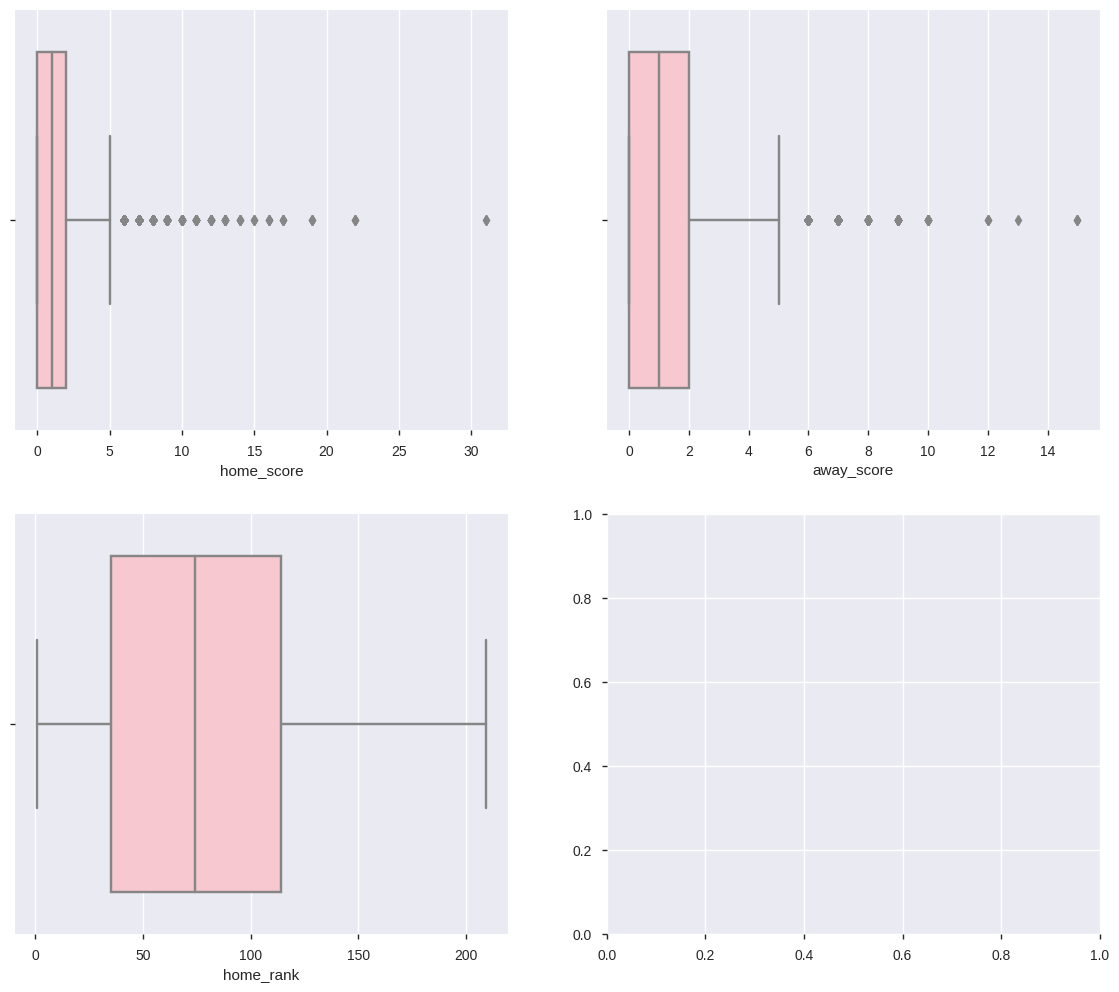

In [159]:
# We define a new list containing the variables we want to observe.
outliers = ['home_score', 'away_score','home_rank',]

# specify the number of columns and rows we want in the boxplots.
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize=(14,12))


# We create a function to loop over the given multiple features to give  the boxplot of the outliers 
for ax, data,column in zip(axes.flatten(),final_data,outliers):
  sns.boxplot(final_data[column],ax=ax, color = 'pink')

There are outliers but based on the nature of rankings, we will not eliminate the rankings.



Dataset has duplicate rows. We need to drop these.

In [20]:
final_data.duplicated().sum()

11614

In [21]:

#Dataset has 13 duplicate rows. We need to drop these.
final_data.drop_duplicates(keep=False,inplace=True) 
final_data.duplicated().sum()

0

In [22]:
final_data.isnull().sum()

home_rank                  0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
year                       0
month                      0
day_x                      0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
day_y                      0
away_rank                  0
dtype: int64

our data has no missing values

In [183]:
final_data.columns

Index(['home_rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'year',
       'month', 'day_x', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'city', 'country', 'neutral', 'day_y',
       'away_rank'],
      dtype='object')

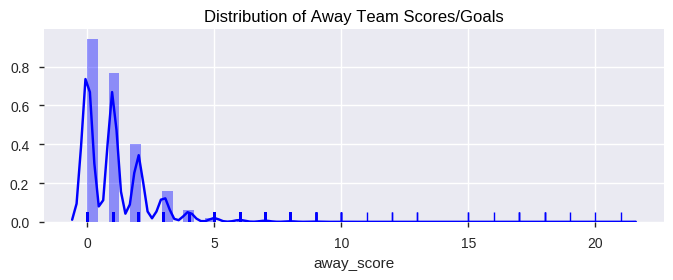

In [0]:
plt.subplot(212)
sns.distplot(final_data["away_score"],color="blue",rug=True)
plt.title("Distribution of Away Team Scores/Goals",color='black')
plt.show()

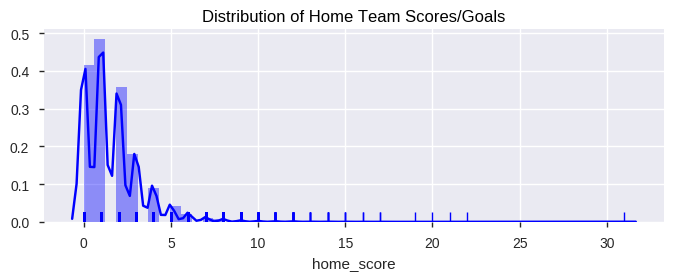

In [0]:
plt.subplot(212)
sns.distplot(final_data["home_score"],color="blue",rug=True)
#plt.xticks(np.arange(0,9,1))
plt.title("Distribution of Home Team Scores/Goals",color='black')
plt.show()

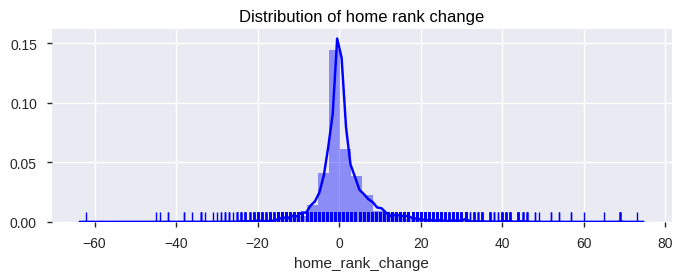

In [0]:
plt.subplot(212)
sns.distplot(final_data["home_rank_change"],color="blue",rug=True)
plt.title("Distribution of home rank change",color='black')
plt.show()

In [184]:
# The code group country team  that produced teams that perfomed very well based on the Total points and how many away score they scored
final_data.groupby(['country','total_points','away_score']).max()


home_rank country_full  ... day_y  away_rank
country     total_points away_score                          ...                 
Afghanistan 213.85       0                 139  Afghanistan  ...    20        167
Albania     0.00         0                 109      Albania  ...    27        174
                         1                 113      Albania  ...    31        146
                         2                 109      Albania  ...    16        102
                         3                  75      Albania  ...    28         16
...                                        ...          ...  ...   ...        ...
Zimbabwe    357.81       1                  98     Zimbabwe  ...     9         80
            359.27       1                 100     Zimbabwe  ...     6        128
            433.97       0                  74     Zimbabwe  ...    10         76
            461.69       1                  70     Zimbabwe  ...    15         53
            489.54       0                  66     Zimbabwe  ...     4        128

[3802 rows x 27 columns]

From above analysis, afghanistan had the top teams played based on total points  and away scores followed by alabamia and zimbambwe.

---



In [0]:
#We want to check the country with the highest points based on the total_points

print(final_data[['rank_date','country','total_points']].sort_values('total_points',ascending=False).head(10))

print('***********************************************')


print('Highest points is',final_data['total_points'].max())

       rank_date    country  total_points
16196 2015-06-04    Germany       1775.03
15999 2015-03-12    Germany       1770.06
15492 2014-09-18    Germany       1765.05
15493 2014-09-18    Germany       1765.05
15792 2014-11-27    Germany       1725.29
15695 2014-10-23    Germany       1668.83
17222 2016-09-15  Argentina       1645.74
17655 2017-03-09  Argentina       1644.27
17538 2016-11-24  Argentina       1634.02
18215 2017-10-16    Germany       1631.05
***********************************************
Highest points is 1775.03


In [112]:
#Check the highest playing tournaments
Highest=final_data.tournament.value_counts().head()
Highest

Friendly                                6858
FIFA World Cup qualification            4282
UEFA Euro qualification                 1436
African Cup of Nations qualification     951
AFC Asian Cup qualification              430
Name: tournament, dtype: int64

In [191]:
final_data.columns

Index(['home_rank', 'country_full', 'country_abrv', 'home_total_points',
       'home_previous_points', 'home_rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'year',
       'month', 'day_x', 'results_date', 'home_team', 'away_team',
       'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral',
       'day_y', 'away_rank', 'scores'],
      dtype='object')

In [0]:
#We then create a function to define the three options for draw , win , loss

def results(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Loss'
  else:
    return 'Draw'


In [0]:
# Then we calculate the score difference by subtracting the home score minus the away score
final_data['scores'] = final_data['home_score'] - final_data['away_score']
#


In [0]:
#Create a new column called status that contains the three options from the function
final_data['status']=final_data['scores'].apply(lambda x :results(x))

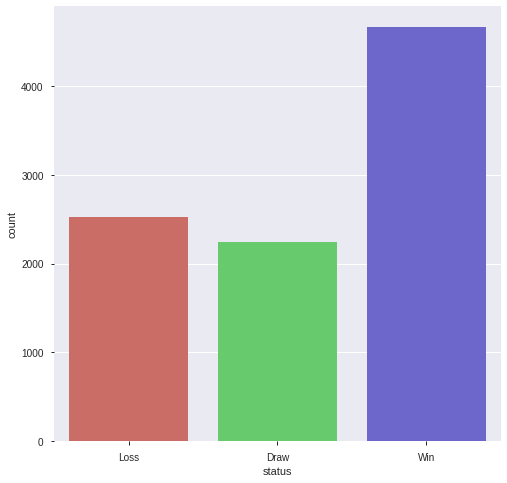

In [208]:
# Visualizing the results  for win, loss and draw

plt.figure(figsize=(8,8))
sns.countplot(x='status',data=final_data, palette='hls')

##**Creation of prediction dataset**

In [32]:
#We create a new dataframe with the columns  that are required for prediction i.e Home team, away team, home score, tournament type,home rank, status and away rank

pred_data= final_data[['home_rank','away_rank','home_team', 'away_team', 'home_score','away_score','tournament','status']]
print(pred_data.shape)
pred_data.head()

(9432, 8)


,home_rank,away_rank,home_team,away_team,home_score,away_score,tournament,status
0,4,3,Sweden,Switzerland,1,2,Friendly,Loss
1,4,12,Sweden,France,1,1,FIFA World Cup qualification,Draw
15,8,14,Brazil,Mexico,1,1,Friendly,Draw
25,8,59,Brazil,Bolivia,6,0,FIFA World Cup qualification,Win
26,10,84,Denmark,Lithuania,4,0,FIFA World Cup qualification,Win


###**Multicollienality**

In [210]:
pred_data.corr()

,home_rank,away_rank,home_score,away_score
home_rank,1.000000,0.390367,-0.174816,0.217920
away_rank,0.390367,1.000000,0.341376,-0.235451
home_score,-0.174816,0.341376,1.000000,-0.167827
away_score,0.217920,-0.235451,-0.167827,1.000000


According the correlation above, independent variables are not highly correlated as none is above or close to 1. This means that we can use the variables to predict our model.

###**Approach 1 Polynomial approach**
What to train given:

Rank of home team
Rank of away team
Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

###**Model 1: Predict how many goals the home team scores.**

In [0]:
pred_data1 = pred_data[['home_score','away_score','tournament','home_rank','away_rank']]


In [41]:
# We create labels for the categorical tournament column. This is called encoding.

lb_make = LabelEncoder()
pred_data1['tournament_code'] = lb_make.fit_transform(pred_data1['tournament'])
pred_data1.head()

,home_score,away_score,tournament,home_rank,away_rank,tournament_code
0,1,2,Friendly,4,3,27
1,1,1,FIFA World Cup qualification,4,12,26
15,1,1,Friendly,8,14,27
25,6,0,FIFA World Cup qualification,8,59,26
26,4,0,FIFA World Cup qualification,10,84,26


In [0]:
# obtaining the attributes and the label
X = pred_data1[['away_score', 'tournament_code','home_rank','away_rank']].values
y = pred_data1['home_score']

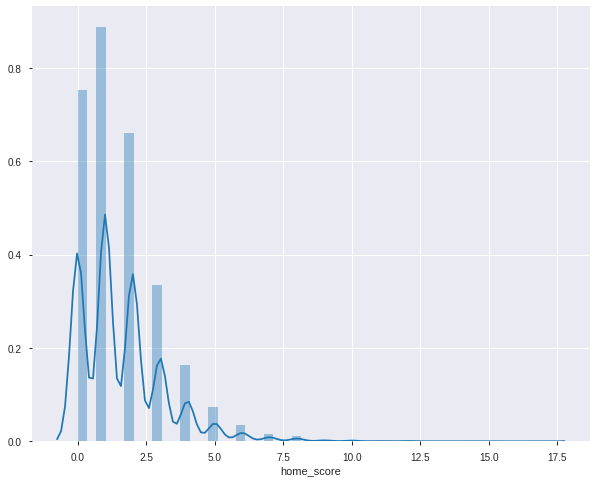

In [217]:
#  A graphical view of the home score variables
plt.figure(figsize = (10,8))
plt.tight_layout()

#We plot using a distribution plot
sns.distplot(pred_data1['home_score']) 
plt.show()

In [0]:
# splitting using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
pol_reg = PolynomialFeatures(degree = 2)
X_train_poly = pol_reg.fit_transform(X_train)
X_test_poly = pol_reg.fit_transform(X_test)
pol_reg.fit(X_train_poly, y_train)

pol_regressor = LinearRegression()
pol_regressor.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# making predictions 
y_pred = np.round(pol_regressor.predict(X_test_poly),3)

In [48]:
#We compare the results of the predicted with the actual results in the y-test data
compare = pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(compare.head())
compare.describe()


       Actual  Predicted
16812       2      0.500
18585       3      0.874
2804        2      1.273
27575       0      0.712
21689       0      1.543


,Actual,Predicted
count,1887.000000,1887.000000
mean,1.609433,1.632197
std,1.586186,0.809183
min,0.000000,0.217000
25%,0.000000,1.080500
50%,1.000000,1.504000
75%,2.000000,2.008500
max,17.000000,5.899000


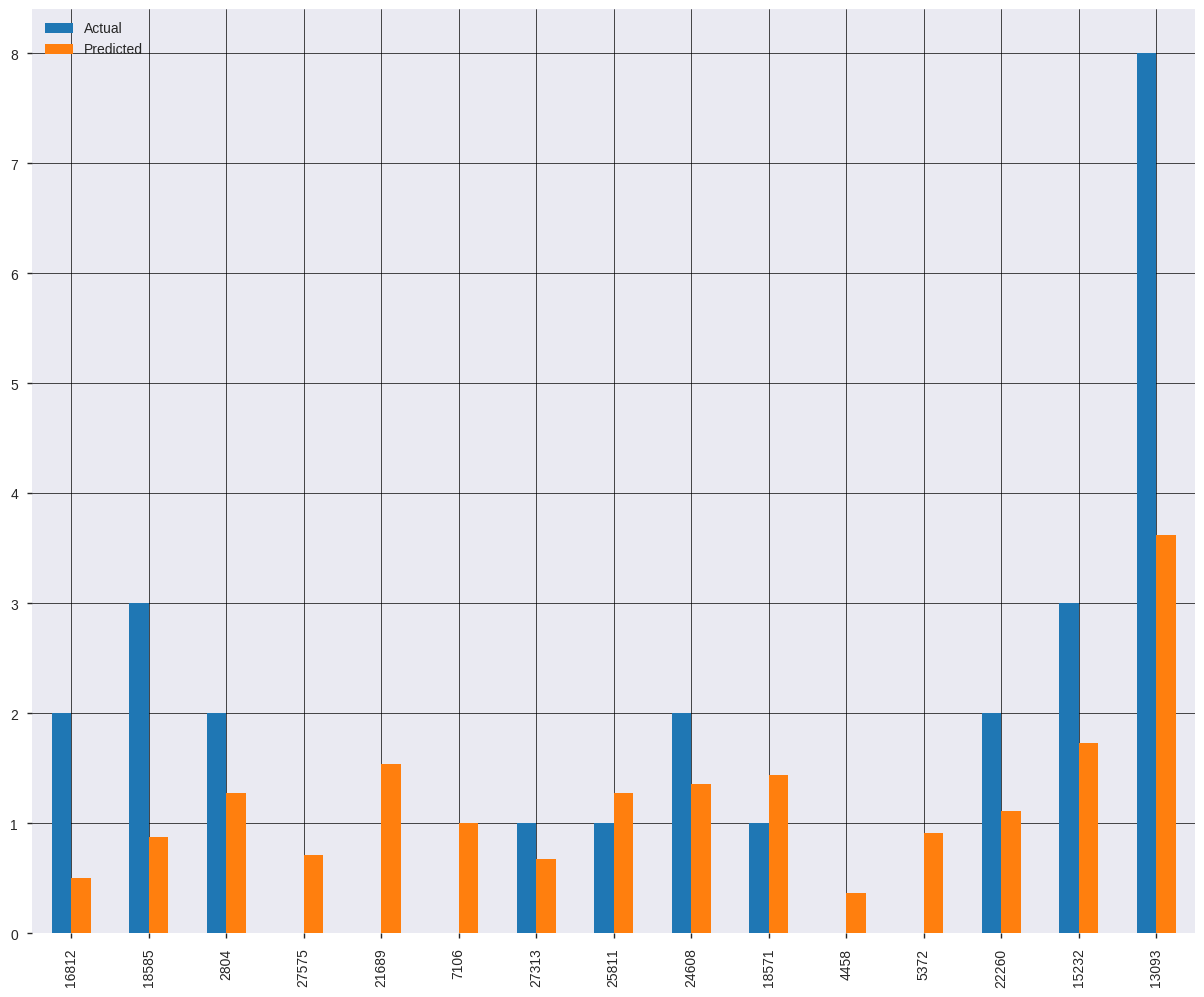

In [49]:
#  We use a comparative bar graph to show the difference between Actual vs Predicted
df1 = compare.head(15)
df1.plot(kind = 'bar', figsize = (15,12))
plt.grid(which = 'major',linestyle = '-', linewidth = '0.5', color = 'black')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'grey')

In [50]:
# We compute RMSE to see the Error rate
print('Root Mean Squared Error:', np.round(np.sqrt((metrics.mean_squared_error(y_test,y_pred))),4))

Root Mean Squared Error: 1.3923


The model has an RMSE score of 1.3923 . This shows the model is not accurate and can not be used to make predictions

##**Residual plots and Heteroskedasticity Testing**

In [51]:
#Step 1
# create the residual by subtracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)

#Step 2
# statistical description
residual = pd.DataFrame(residuals).describe()

#Step 3
# mean 
residuals.mean()

0.022764175940646524

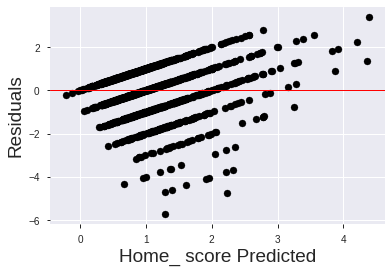

In [93]:
#Step 4
#  We create residual plot of actual vs predicted
plt.scatter(y_pred, residuals, color = 'black')
plt.ylabel('Residuals', fontsize = 19)
plt.xlabel('Home_ score Predicted', fontsize = 19)
plt.axhline(y = residuals.mean(), color = 'r', linewidth = 1)
plt.show()


Most residuals are not centeres around the mean.

##**Barlett's Test**
The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [54]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# compute the critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, reject the null hypothesis. 
# This means there are patterns to the variance of the data

# Otherwise, identify no patterns, and  accept the null hypothesis 
# The variance is homogeneous across our data

if(test_result > critical_value):
    print("the variances are unequal, and the model should be reassessed")
else:
    print("The variances are homogeneous!")

The variances are homogeneous!


##**Model 2: Predict how many goals the away team scores.**

In [0]:
pred_data2 = pred_data[['home_score','away_score','tournament','home_rank','away_rank']]

In [57]:
lb_make = LabelEncoder()
pred_data2['tournament_code'] = lb_make.fit_transform(pred_data2['tournament'])
pred_data2.head()

,home_score,away_score,tournament,home_rank,away_rank,tournament_code
0,1,2,Friendly,4,3,27
1,1,1,FIFA World Cup qualification,4,12,26
15,1,1,Friendly,8,14,27
25,6,0,FIFA World Cup qualification,8,59,26
26,4,0,FIFA World Cup qualification,10,84,26


In [0]:
# obtaining the attributes and the label
X = pred_data1[['home_score', 'tournament_code','home_rank','away_rank']].values
y = pred_data1['away_score']

##**VIF(Variance Inflation Factor)**

In [78]:
x1 = X.copy()
x1 = pd.DataFrame(x1,columns=['home_score', 'tournament_code','home_rank','away_rank'])
x1

,home_score,tournament_code,home_rank,away_rank
0,1,27,4,3
1,1,26,4,12
2,1,27,8,14
3,6,26,8,59
4,4,26,10,84
...,...,...,...,...
9427,1,10,129,94
9428,0,14,137,123
9429,6,14,139,155
9430,0,14,147,118


In [79]:
from sklearn.preprocessing import Normalizer
correlation = x1.corr()
correlation


,home_score,tournament_code,home_rank,away_rank
home_score,1.000000,-0.008287,-0.174816,0.341376
tournament_code,-0.008287,1.000000,-0.197942,-0.200102
home_rank,-0.174816,-0.197942,1.000000,0.390367
away_rank,0.341376,-0.200102,0.390367,1.000000


In [80]:
#Compute the variation inflation factor
vif_data = pd.DataFrame(np.linalg.inv(correlation.values), index  = correlation.index, columns = correlation.columns)
vif_data

,home_score,tournament_code,home_rank,away_rank
home_score,1.296683,-0.022645,0.468098,-0.629919
tournament_code,-0.022645,1.060820,0.141740,0.164672
home_rank,0.468098,0.141740,1.369959,-0.666223
away_rank,-0.629919,0.164672,-0.666223,1.508062


home_score has a score of 1.29 , home_rank score of 1.06, home_rank 1.36 and away_rank score of 1.508
all of the points are below 5 hence no colinearity between the variables. 

This means we will not drop any independent variables for our prediction 

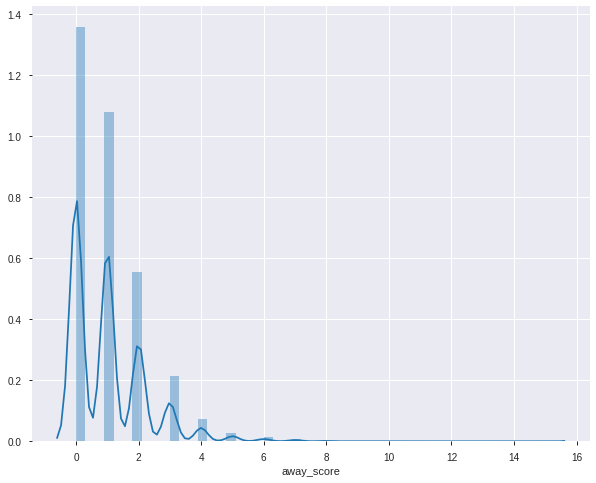

In [81]:
#  A graphical view of the home score variables
plt.figure(figsize = (10,8))
plt.tight_layout()

#We plot using a distribution plot
sns.distplot(pred_data2['away_score']) 
plt.show()

In [0]:
# splitting using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [83]:
reg_line = LinearRegression()
reg_line.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
pol_reg = PolynomialFeatures(degree = 2)
X_train_poly = pol_reg.fit_transform(X_train)
X_test_poly = pol_reg.fit_transform(X_test)
pol_reg.fit(X_train_poly, y_train)

pol_regressor = LinearRegression()
pol_regressor.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# making predictions 
y_pred = np.round(pol_regressor.predict(X_test_poly),3)

In [86]:
#We compare the results of the predicted with the actual results in the y-test data
compare = pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(compare.head())
compare.describe()

       Actual  Predicted
16812       2      2.557
18585       1      1.510
2804        1      1.231
27575       3      1.802
21689       1      0.873


,Actual,Predicted
count,1887.000000,1887.000000
mean,1.002120,1.036256
std,1.098536,0.561626
min,0.000000,-0.213000
25%,0.000000,0.651000
50%,1.000000,0.948000
75%,2.000000,1.276500
max,7.000000,4.392000


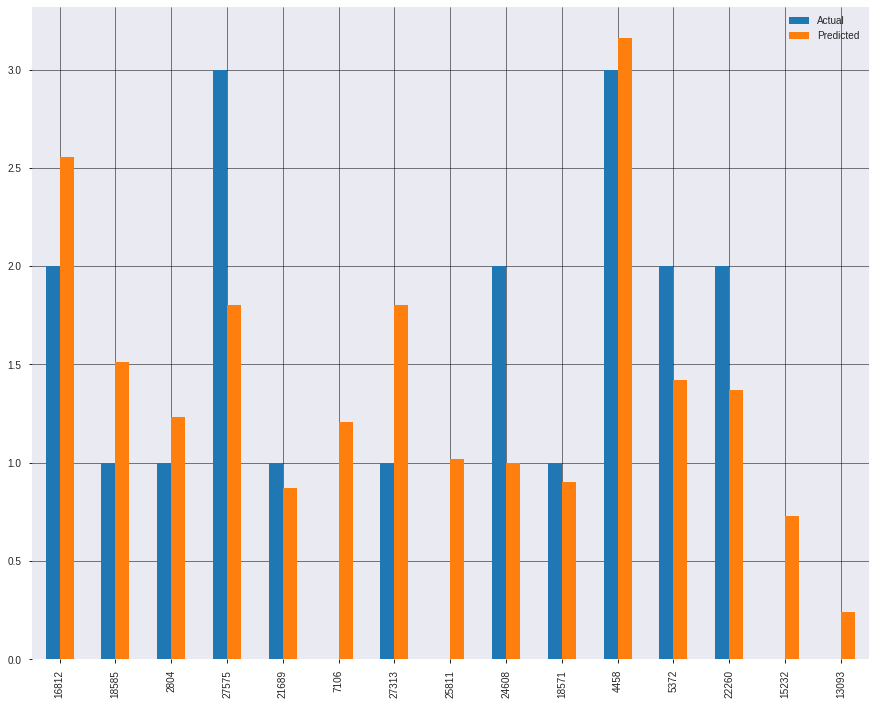

In [87]:
#  We use a comparative bar graph to show the difference between Actual vs Predicted
df1 = compare.head(15)
df1.plot(kind = 'bar', figsize = (15,12))
plt.grid(which = 'major',linestyle = '-', linewidth = '0.5', color = 'black')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'grey')

In [88]:
# We compute RMSE to see the Error rate
print('Root Mean Squared Error:', np.round(np.sqrt((metrics.mean_squared_error(y_test,y_pred))),4))

Root Mean Squared Error: 1.0214


The model has an RMSE score of 1.0214 . This shows the model is not accurate and can not be used to make predictions

##**Residual plots and Heteroskedasticity Testing**

In [90]:
# create the residual by subtracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)

# stattistucal describtion
pd.DataFrame(residuals).describe()

# the mean
residuals.mean()

0.03413672496025435

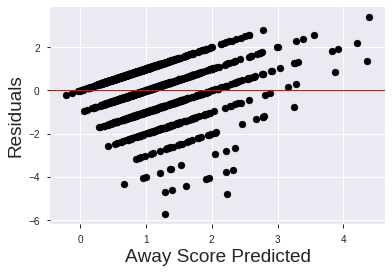

In [92]:
# We plot the residual plot
plt.scatter(y_pred, residuals, color = 'black')
plt.ylabel('Residuals', fontsize = 19)
plt.xlabel('Away Score Predicted', fontsize = 19)
plt.axhline(y = residuals.mean(), color = 'r', linewidth = 1)
plt.show()



*   There are no patterns from the plot above
*   Since the residuals aren't plotted very close to mean


##**Approach 2: Logistic approach**

In [94]:
pred_data.head()

,home_rank,away_rank,home_team,away_team,home_score,away_score,tournament,status
0,4,3,Sweden,Switzerland,1,2,Friendly,Loss
1,4,12,Sweden,France,1,1,FIFA World Cup qualification,Draw
15,8,14,Brazil,Mexico,1,1,Friendly,Draw
25,8,59,Brazil,Bolivia,6,0,FIFA World Cup qualification,Win
26,10,84,Denmark,Lithuania,4,0,FIFA World Cup qualification,Win


In [0]:
# creating a function to convert tournament type to world Cup, Friendly and other 
def tournament(z): 
    if (z == 'Friendly'):
        return 'Friendly'
    elif (z == 'FIFA World Cup qualification') or (z == 'FIFA World Cup') :
        return 'World cup'
    else:
        return 'Other'

In [0]:
pred_data['tournament_type'] = pred_data.tournament.apply(lambda x: tournament(x))

In [100]:
#Preview the data
pred_data.head(10)

,home_rank,away_rank,home_team,away_team,home_score,away_score,tournament,status,tournament_type
0,4,3,Sweden,Switzerland,1,2,Friendly,Loss,Friendly
1,4,12,Sweden,France,1,1,FIFA World Cup qualification,Draw,World cup
15,8,14,Brazil,Mexico,1,1,Friendly,Draw,Friendly
25,8,59,Brazil,Bolivia,6,0,FIFA World Cup qualification,Win,World cup
26,10,84,Denmark,Lithuania,4,0,FIFA World Cup qualification,Win,World cup
49,38,47,Austria,Finland,3,0,FIFA World Cup qualification,Win,World cup
50,52,46,Australia,Canada,2,1,FIFA World Cup qualification,Win,World cup
51,58,25,Senegal,Zambia,0,0,FIFA World Cup qualification,Draw,World cup
52,59,22,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Win,World cup
61,107,65,Congo,Guinea,0,0,African Cup of Nations qualification,Draw,Other


In [104]:
#Create new dataframe with the columns required for this approach
log_data = pred_data[['away_rank','home_rank','away_score','home_score','home_team','away_team','tournament_type','status']]
log_data.head()

,away_rank,home_rank,away_score,home_score,home_team,away_team,tournament_type,status
0,3,4,2,1,Sweden,Switzerland,Friendly,Loss
1,12,4,1,1,Sweden,France,World cup,Draw
15,14,8,1,1,Brazil,Mexico,Friendly,Draw
25,59,8,0,6,Brazil,Bolivia,World cup,Win
26,84,10,0,4,Denmark,Lithuania,World cup,Win


In [105]:
#We encode the categorical column i.e tournament type and status
lb = LabelEncoder()
log_data['tournament_type'] = lb.fit_transform(log_data['tournament_type'])
log_data['status'] = lb.fit_transform(log_data['status'])

log_data.head()

,away_rank,home_rank,away_score,home_score,home_team,away_team,tournament_type,status
0,3,4,2,1,Sweden,Switzerland,0,1
1,12,4,1,1,Sweden,France,2,0
15,14,8,1,1,Brazil,Mexico,0,0
25,59,8,0,6,Brazil,Bolivia,2,2
26,84,10,0,4,Denmark,Lithuania,2,2


In [106]:
# Create dataframe for logistic regression
data1= log_data[['home_score','away_score','home_rank','away_rank','tournament_type','status']]
data1.head()

,home_score,away_score,home_rank,away_rank,tournament_type,status
0,1,2,4,3,0,1
1,1,1,4,12,2,0
15,1,1,8,14,0,0
25,6,0,8,59,2,2
26,4,0,10,84,2,2


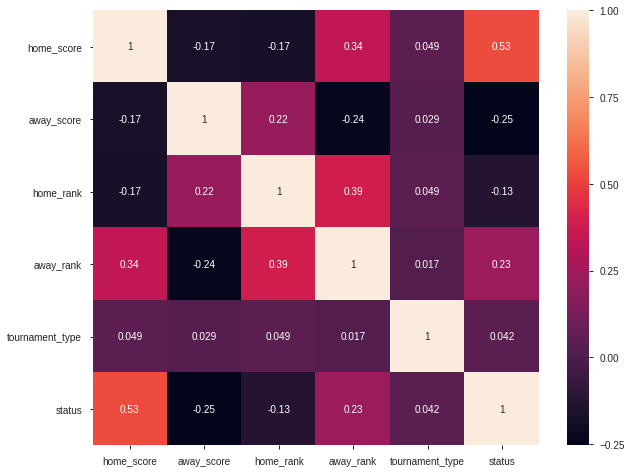

In [111]:
#Plot this variables in a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(data1.corr(), annot=True)


In [0]:
X = data1[['home_score','away_score','home_rank','away_rank','tournament_type']].values
y = data1['status']


In [0]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [117]:
# fitting the model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
# making prediction
y_pred = LogReg.predict(X_test)
y_pred

array([0, 2, 2, ..., 1, 0, 1])

In [120]:
# making comparison
comparison = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
comparison.head()

,Actual,Predicted
16812,0,0
18585,2,2
2804,2,2
27575,1,1
21689,1,1


In [121]:
comparison.describe()

,Actual,Predicted
count,1887.000000,1887.000000
mean,1.258612,1.258612
std,0.815998,0.815998
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,2.000000,2.000000


In [122]:
# evaluating the model
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print('confusion_matrix','\n',confusion_matrix)
classification_report = classification_report(y_test, y_pred)
print('classification_report','\n',classification_report)

confusion_matrix 
 [[447   0   0]
 [  0 505   0]
 [  0   0 935]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       505
           2       1.00      1.00      1.00       935

    accuracy                           1.00      1887
   macro avg       1.00      1.00      1.00      1887
weighted avg       1.00      1.00      1.00      1887



##**Conclusion and Recommendation**



*   The model has 100% accuracy, which cannot be good since it predicted everything correctly
*   More variables/features can be included to train the model better.

*   We can use alternative model methods to see if the accuracy will change.

*   Use current ranking to make near future predictions



